In [1]:
import scanpy as sc
import mudata as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys
sys.path.append('../')

from latentcor import get_tps, latentcor
from utils.gglasso_pipeline import gg_lasso_network_analysis
from utils.utils import calc_sparsity

In [2]:
ec_adata = sc.read_h5ad(filename='../data/preprocessed/ec_prepro.h5ad')
psa_adata = sc.read_h5ad(filename='../data/preprocessed/psa_prepro.h5ad')
efm_adata = sc.read_h5ad(filename='../data/preprocessed/efm_prepro.h5ad')
mgh_adata = sc.read_h5ad(filename='../data/preprocessed/mgh_prepro.h5ad')

In [3]:
sc.pp.calculate_qc_metrics(ec_adata, inplace=True)
sc.pp.calculate_qc_metrics(psa_adata, inplace=True)
sc.pp.calculate_qc_metrics(efm_adata, inplace=True)
sc.pp.calculate_qc_metrics(mgh_adata, inplace=True)

This plot describes the relationship between the number of cells that express a certain gene and the total number of counts reported for that gene. The plots show that they follow almost a x=y relationship meaning that lots of the genes are not expressed in great abundance but rather in low copy numbers (range of 1-5).

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

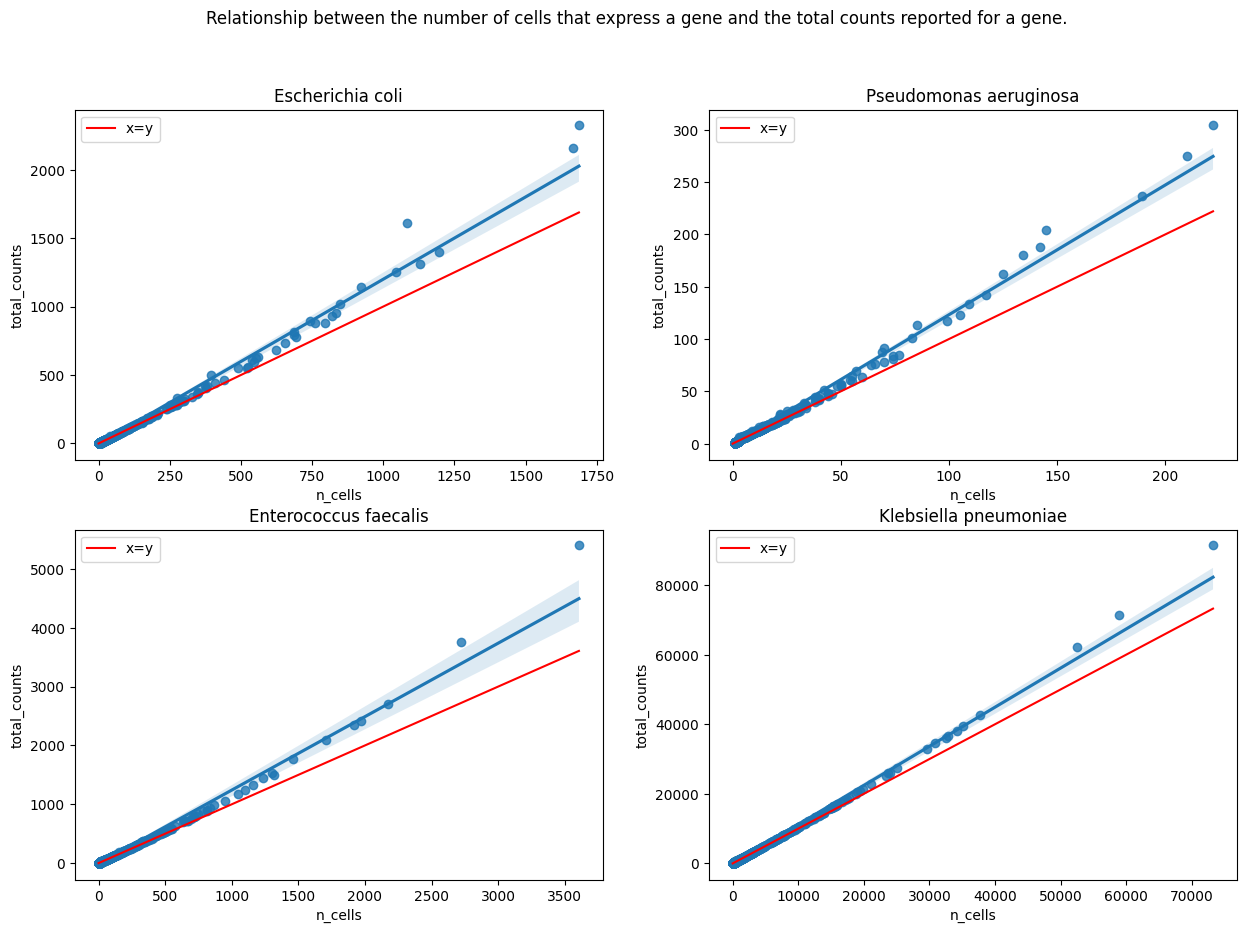

In [4]:
lim_ec  = min(ec_adata.var.n_cells.max(), ec_adata.var.total_counts.max())
lim_psa = min(psa_adata.var.n_cells.max(), psa_adata.var.total_counts.max())
lim_efm = min(efm_adata.var.n_cells.max(), efm_adata.var.total_counts.max())
lim_mgh = min(mgh_adata.var.n_cells.max(), mgh_adata.var.total_counts.max())

line_ec = [0, lim_ec]
line_psa = [0, lim_psa]
line_efm = [0, lim_efm]
line_mgh = [0, lim_mgh]

fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.regplot(ec_adata.var, x='n_cells', y='total_counts', ax=axes[0][0])
sns.lineplot(x=line_ec, y=line_ec, color='red', label='x=y', ax=axes[0][0])

sns.regplot(psa_adata.var, x='n_cells', y='total_counts', ax=axes[0][1])
sns.lineplot(x=line_psa, y=line_psa, color='red', label='x=y', ax=axes[0][1])

sns.regplot(efm_adata.var, x='n_cells', y='total_counts', ax=axes[1][0])
sns.lineplot(x=line_efm, y=line_efm, color='red', label='x=y', ax=axes[1][0])

sns.regplot(mgh_adata.var, x='n_cells', y='total_counts', ax=axes[1][1])
sns.lineplot(x=line_mgh, y=line_mgh, color='red', label='x=y', ax=axes[1][1])

axes[0,0].set_title("Escherichia coli")
axes[0,1].set_title("Pseudomonas aeruginosa")
axes[1,0].set_title("Enterococcus faecalis")
axes[1,1].set_title("Klebsiella pneumoniae")
fig.suptitle("Relationship between the number of cells that express a gene and the total counts reported for a gene.")

plt.legend()
plt.show()

Here we see the same phenomenon as in the plot above. Lots of genes are expressed in low copy numbers

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Distribution of gene abundance')

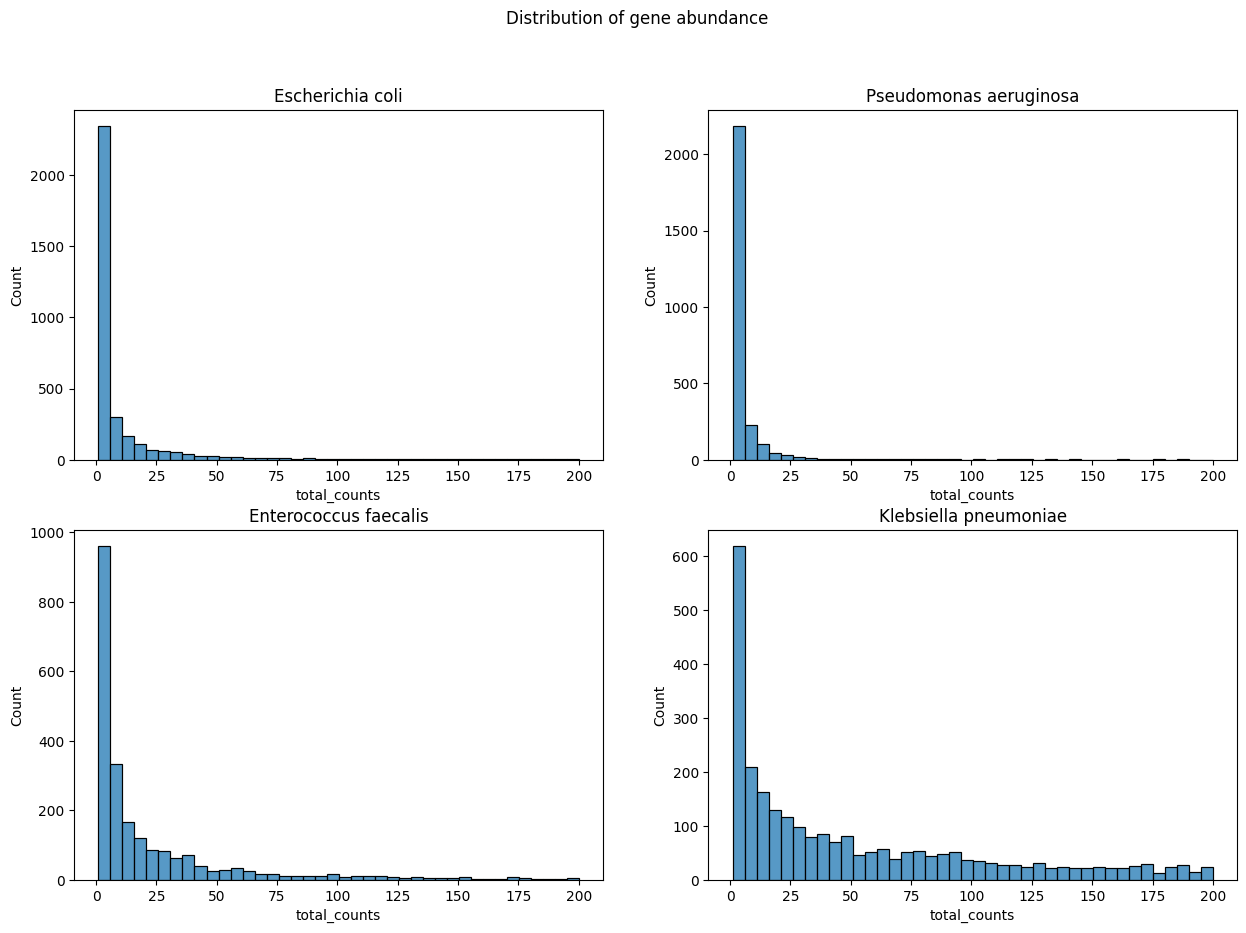

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(ec_adata.var.total_counts, binrange=(1, 200), bins=40, ax=axes[0][0])
sns.histplot(psa_adata.var.total_counts, binrange=(1, 200), bins=40, ax=axes[0][1])
sns.histplot(efm_adata.var.total_counts, binrange=(1, 200), bins=40, ax=axes[1][0])
sns.histplot(mgh_adata.var.total_counts, binrange=(1, 200), bins=40, ax=axes[1][1])

axes[0,0].set_title("Escherichia coli")
axes[0,1].set_title("Pseudomonas aeruginosa")
axes[1,0].set_title("Enterococcus faecalis")
axes[1,1].set_title("Klebsiella pneumoniae")
fig.suptitle("Distribution of gene abundance")

Additionally / Therefore most of the cells have low gene expression (~<25 counts per cell)

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Distribution of reads per cell')

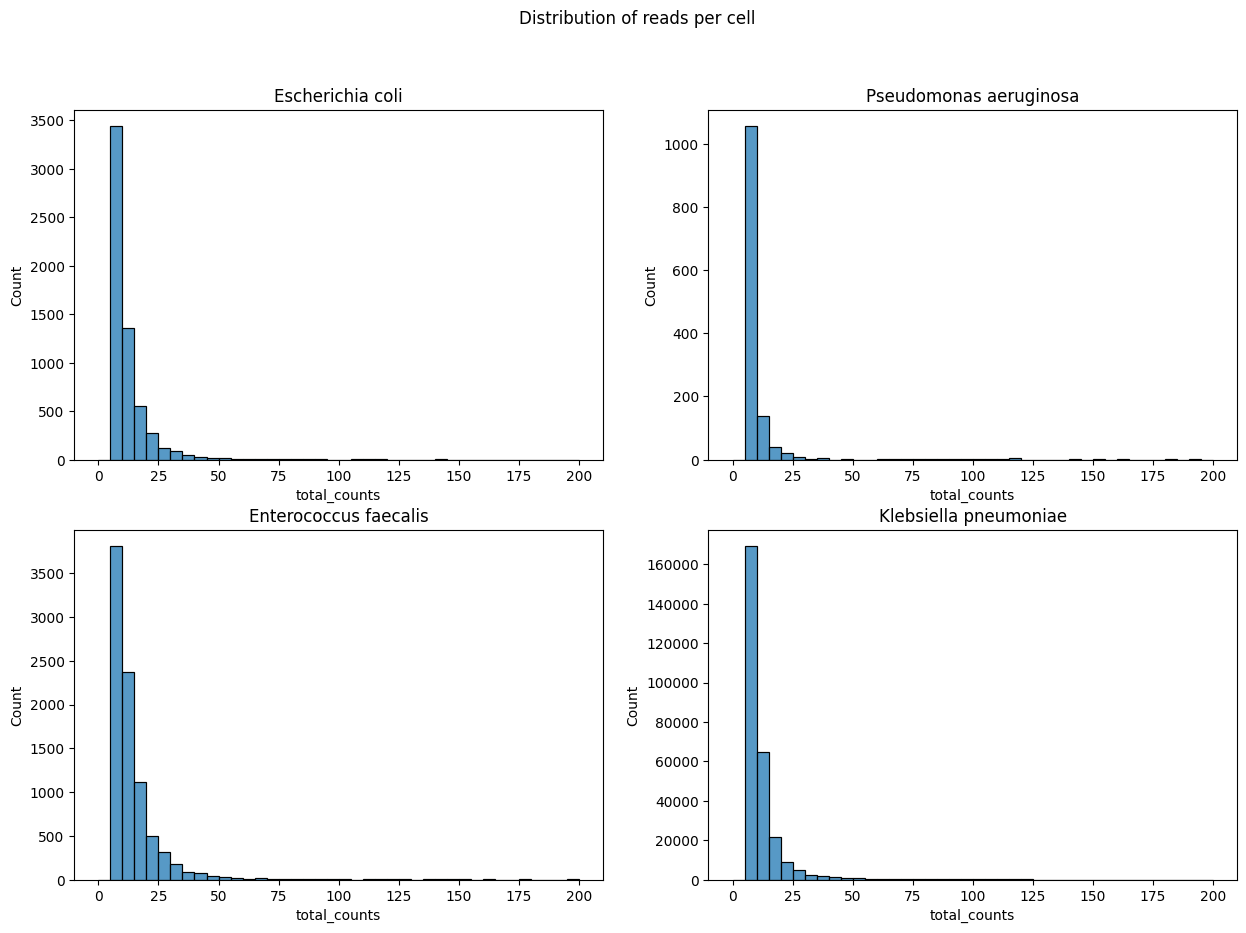

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(ec_adata.obs.total_counts, binrange=(0, 200), bins=40, ax=axes[0][0])
sns.histplot(psa_adata.obs.total_counts, binrange=(0, 200), bins=40, ax=axes[0][1])
sns.histplot(efm_adata.obs.total_counts, binrange=(0, 200), bins=40, ax=axes[1][0])
sns.histplot(mgh_adata.obs.total_counts, binrange=(0, 200), bins=40, ax=axes[1][1])

axes[0,0].set_title("Escherichia coli")
axes[0,1].set_title("Pseudomonas aeruginosa")
axes[1,0].set_title("Enterococcus faecalis")
axes[1,1].set_title("Klebsiella pneumoniae")
fig.suptitle("Distribution of reads per cell")

Calculating the sparsity of our expression matricies for all species

In [7]:
print("Escherichia coli:\t", calc_sparsity(ec_adata.X.A))
print("Pseudomonas aeruginosa:\t", calc_sparsity(psa_adata.X.A))
print("Enterococcus faecalis:\t", calc_sparsity(efm_adata.X.A))
print("Klebsiella pneumoniae:\t", calc_sparsity(mgh_adata.X.A))

Escherichia coli:	 0.003312267806305129
Pseudomonas aeruginosa:	 0.003846639320215721
Enterococcus faecalis:	 0.005848055674604137
Klebsiella pneumoniae:	 0.0026945192215949818


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


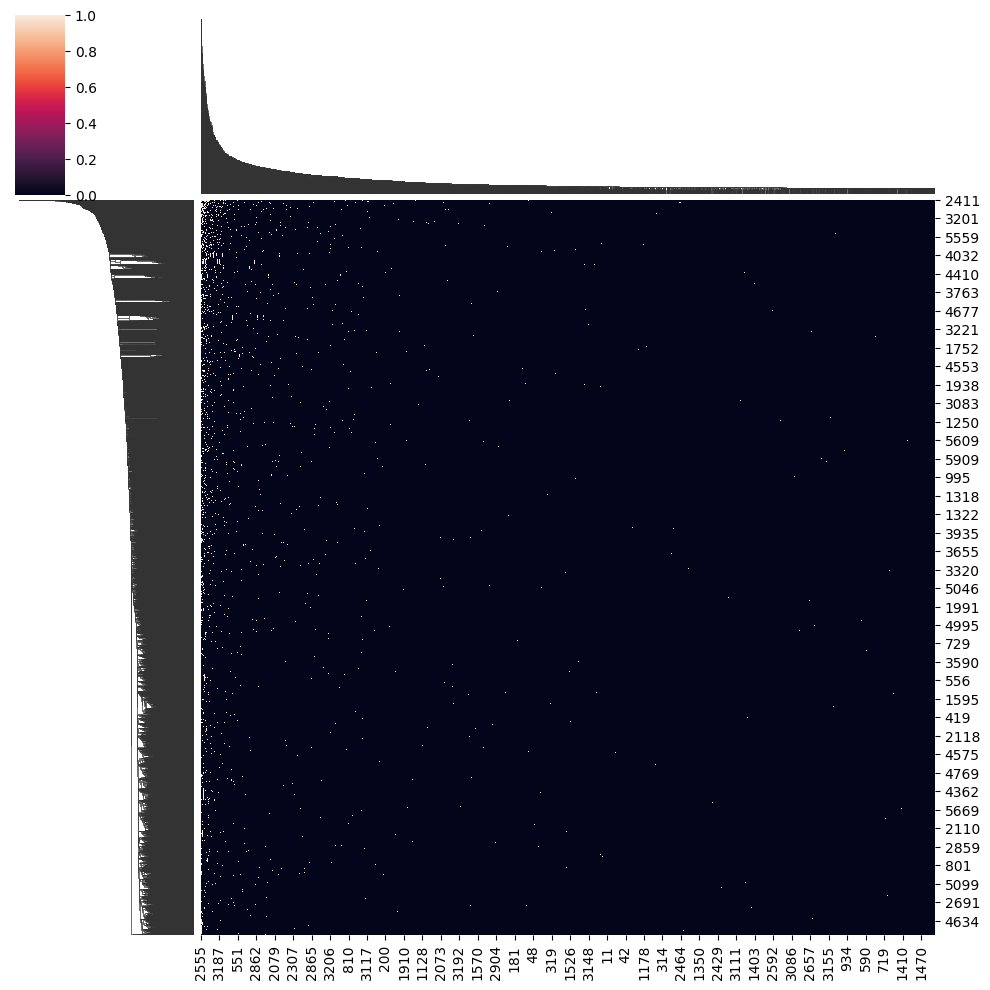

In [8]:
sns.clustermap(np.array(ec_adata.X.A,dtype=bool))

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


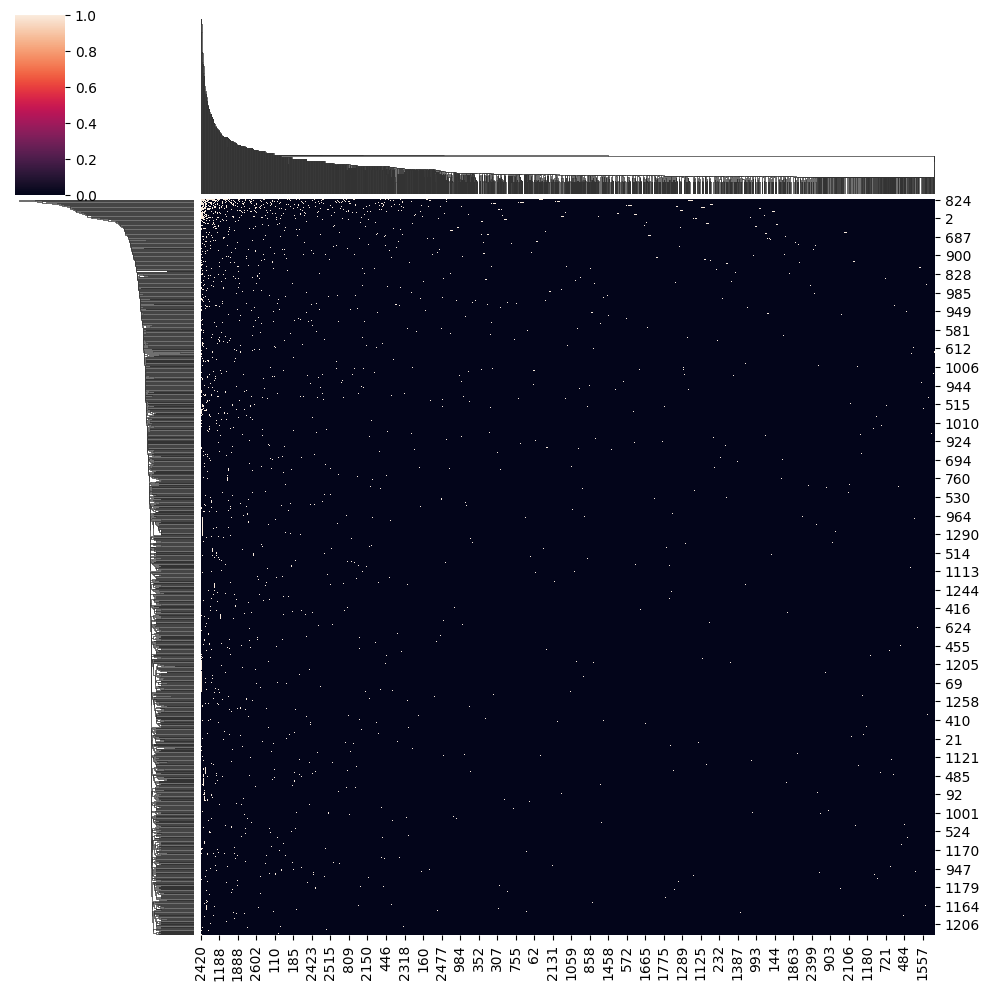

In [9]:
sns.clustermap(np.array(psa_adata.X.A,dtype=bool))

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


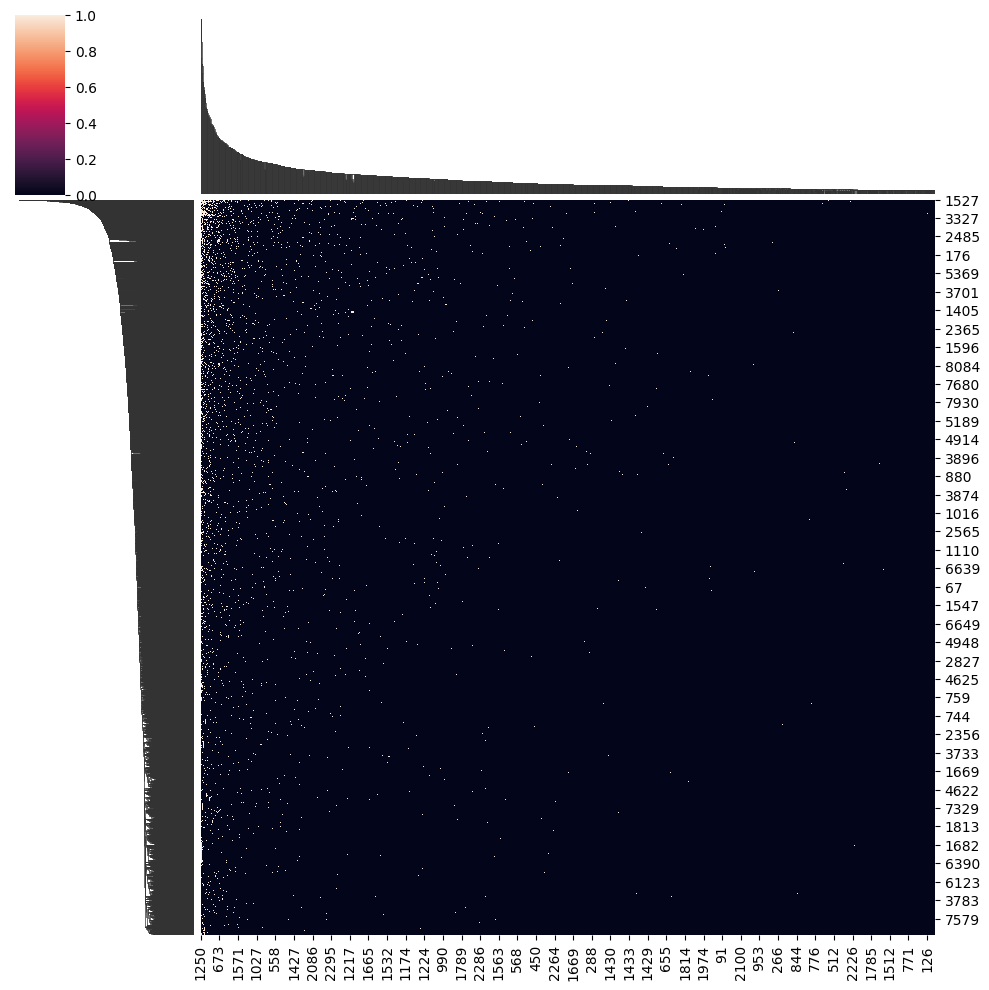

In [10]:
sns.clustermap(np.array(efm_adata.X.A,dtype=bool))

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


MemoryError: Unable to allocate 288. GiB for an array with shape (38631297741,) and data type float64

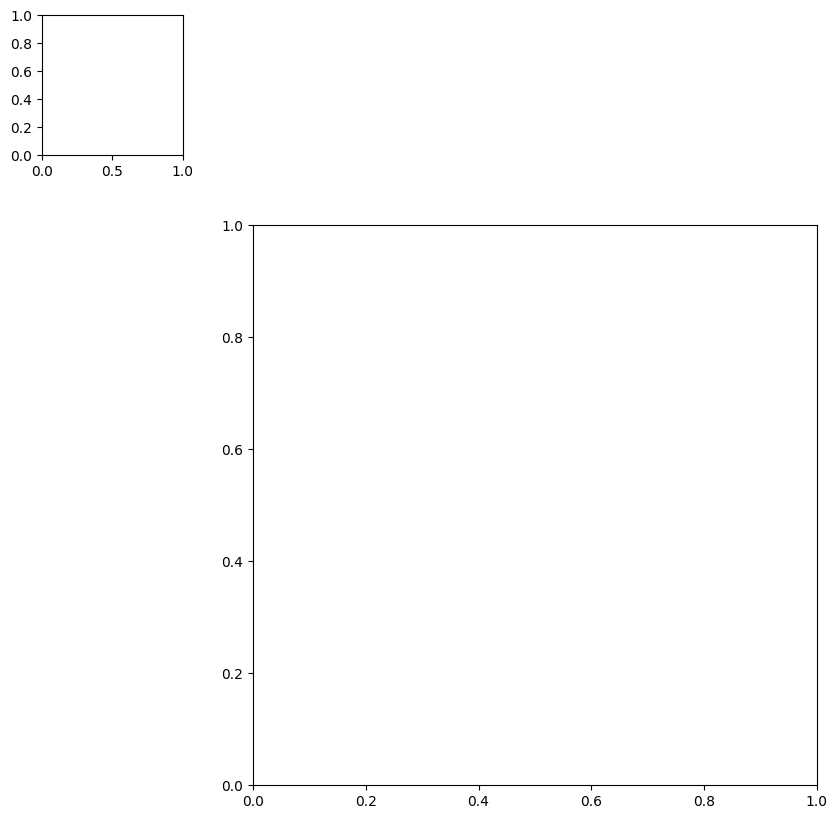

In [11]:
sns.clustermap(np.array(mgh_adata.X.A,dtype=bool))